# PREAMBLE
#### Some prelimiar configurations are made here, before importing the libraries and starting the code.

In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

plotpars_2cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (15, 5.),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3rows = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (6, 9),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

In [2]:
palette = ['#dfc27d', '#a6611a']
palette_inv = ['#a6611a', '#dfc27d']

# Libraries

In [3]:
import numpy                as np
import pandas               as pd
import matplotlib.pyplot    as plt
import seaborn              as sns
import astropy.io.fits      as pf
import os

In [4]:
ppxf_results             = pd.read_csv('../../LargeFilesResults/PSM_analysis/d-1m150parameters_d-1_m150.csv')
ppxf_psm_high_addpolynom = pd.read_csv('../../LargeFilesResults/PSM_analysis/veldisp_d100_m50_matched.csv')
# ppxf_psm_high_addpolynom.drop(['0'], axis=1)

In [5]:
uvup = ppxf_psm_high_addpolynom[ppxf_psm_high_addpolynom['UV_CLASS_YI2011']=='UV_UPTURN']
uvwk = ppxf_psm_high_addpolynom[ppxf_psm_high_addpolynom['UV_CLASS_YI2011']=='UV_WEAK']

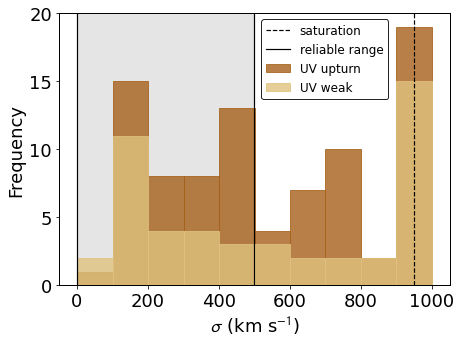

In [6]:
plt.rcParams.update(plotpars)
n, bins, patches = plt.hist(uvup['VEL_DISP'], bins=10, color=palette[1], alpha=0.8, label='UV upturn', 
                            edgecolor=palette[1])
plt.hist(uvwk['VEL_DISP'], bins=bins, color=palette[0], alpha=0.8, label='UV weak', edgecolor=palette[0])
plt.axvline(x=950, label='saturation', linestyle='--', color='black', lw=1.2)
plt.axvline(x=0, label='reliable range', linestyle='-', color='black', lw=1.2)
plt.axvline(x=500, linestyle='-', color='black', lw=1.2)
plt.fill_betweenx(y=np.arange(0,30), x1=0, x2=500, color='gray', alpha=0.2)
plt.ylabel("Frequency")
plt.xlabel(r"$\sigma$ (km s$^{-1}$)")
plt.legend(loc='upper center', bbox_to_anchor=(0.68, 1))
plt.ylim([0,20])

plt.savefig('../../LargeFilesResults/PSM_analysis/d100m50/veldisp_distrib.png')
plt.savefig('../../LargeFilesResults/PSM_analysis/d100m50/veldisp_distrib.pdf')
plt.show()

In [15]:
results = np.array(ppxf_results.keys())

In [52]:
results

array(["['CATAID', 594994, 600232, 609836, 610293, 610441, 617899, 619222, 619575, 6840, 14922, 17387, 22885, 23262, 23618, 231048, 271394, 272306, 273046, 273844, 289261, 289379, 297022, 298594, 301906, 302370, 318790, 318810, 324302, 343900, 361693, 363924, 371001, 381583, 383050, 417755, 422871, 519135, 3582527, 3584590, 3604645, 3613085, 3617808, 3623290, 3627066, 460401, 3878612, 3909928, 30716, 30793, 30897, 31060, 31799, 39013, 41058, 47685, 48688, 49358, 54859, 54925, 54979, 55641, 63271, 84716, 84945, 85618, 85928, 93394, 99005, 106081, 106915, 534783, 536903, 549755, 560345, 560512, 560599, 561506, 569109, 143845, 144624, 145111, 196998, 198705, 203412, 203848, 238896, 240455, 594913, 601015, 611561, 623746, 14926, 15040, 250615, 267010, 272688, 278774, 299132, 319765, 323278, 343316, 348010, 382082, 397040, 397130, 419476, 3860408, 3888446, 31592, 48561, 54640, 54644, 63657, 64081, 64158, 78967, 84295, 85679, 91600, 98073, 105613, 106766, 107237, 107809, 534813, 535469, 5371

In [40]:
res0 = np.squeeze(np.array(results[0].split(',')))

In [51]:
cataid = res0[1:-1].astype('int')

In [55]:
veldisp = np.squeeze(np.array(results[1].split(',')))[1:-1].astype('float')

In [60]:
logage = np.squeeze(np.array(results[4].split(',')))[1:-1].astype('float')

In [65]:
metallicity = np.squeeze(np.array(results[5].split(',')))[1:-1].astype('float')

In [66]:
m2l =  np.squeeze(np.array(results[6].split(',')))[1:-1].astype('float')

In [68]:
metallicity

array([-0.19621593, -0.19661604, -0.19640016, -0.19609351, -0.25507272,
       -0.19639992, -0.21172473, -0.19588907, -0.19617344, -0.19652127,
       -0.19626994, -0.19593815, -0.19675102, -0.19598959, -0.19591843,
       -0.19605019, -0.19608404, -0.19602245, -0.20329348, -0.19600158,
       -0.19606284, -0.28735461, -0.19605678, -0.26019525, -0.19718452,
       -0.19606626, -0.19579715, -0.19600614, -0.19640044, -0.20129548,
       -0.19712205, -0.20467562, -0.19609455, -0.19595999, -0.19587838,
       -0.19687103, -0.38172553, -0.1975793 , -0.28768421, -0.19606895,
       -0.19650006, -0.86272947, -0.19630941, -0.19604277, -1.08703994,
       -0.20067478, -1.10868005, -0.19590801, -0.19605847, -0.62764412,
       -1.11073553, -1.05329424, -0.1959579 , -0.19609018, -0.19600718,
       -0.19579771, -0.19596046, -0.19630486, -0.19590634, -0.19574768,
       -0.19598289, -0.19630047, -0.69171902, -0.92997285, -0.19618038,
       -0.19607613, -0.20688356, -1.07633971, -0.19590945, -0.78